In [1]:
%pip install mglearn


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import mglearn

In [3]:
x_data, y_data = mglearn.datasets.make_forge()
x_train, x_test, y_train, y_test = train_test_split( x_data,y_data, test_size=0.2)

In [4]:
y_data

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [5]:
x_data

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

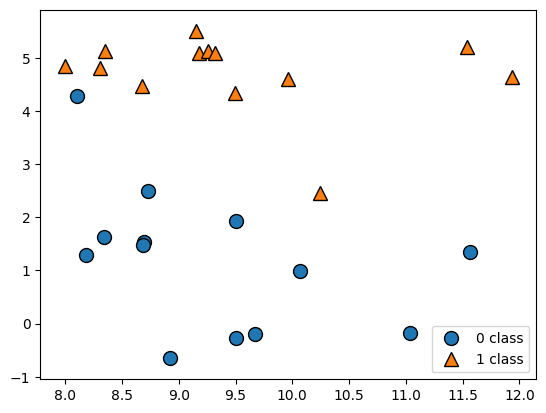

In [6]:
mglearn.discrete_scatter( x_data[:,0], x_data[:,1], y_data )
plt.legend( ['0 class', '1 class'])
plt.show()

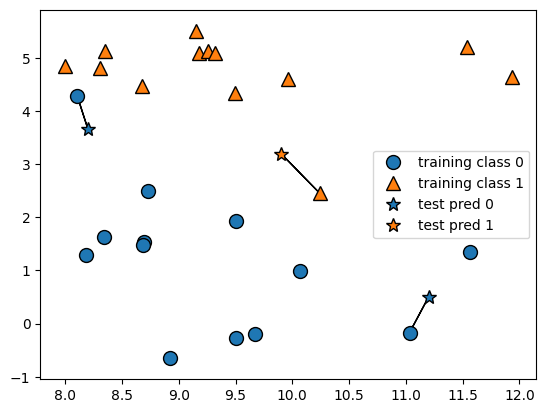

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

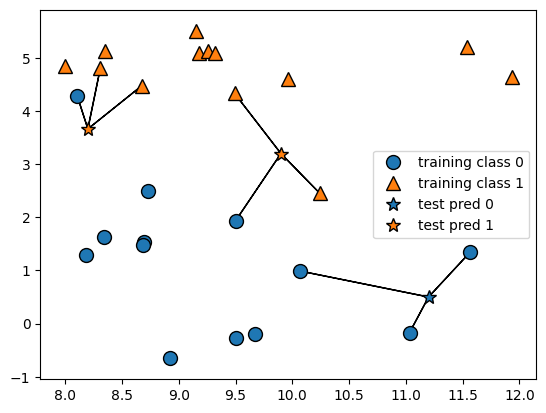

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [11]:
x_data = iris['data']
y_data = iris['target']

In [12]:
model = KNeighborsClassifier( n_neighbors=3 )
model.fit( x_data, y_data)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
model.predict(  [[5.1,3.5,1.4,0.2]] )

c:\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [15]:
pred = model.predict( x_data)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
accuracy_score(y_data, pred )

0.96

In [17]:
precision_score( y_data, pred, average='macro')

0.96

In [18]:
recall_score(  y_data, pred, average='macro')

0.96

In [19]:
f1_score(  y_data, pred, average='macro')

0.96

In [20]:
confusion_matrix( y_data, pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid={'n_neighbors':[1,2,3,4,5] }

In [23]:
model_grid = GridSearchCV( KNeighborsClassifier(), 
                          param_grid=param_grid, verbose=1)
model_grid.fit( x_data, y_data)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


In [24]:
model_grid.best_params_

{'n_neighbors': 4}

In [25]:
model_grid.best_score_

np.float64(0.9733333333333334)

In [26]:
model_best = model_grid.best_estimator_ # KNeighborsClassifier(n_neighbors=4)
model_best.predict(  [[5.1,3.5,1.4,0.2]])

c:\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [27]:
model_grid.best_estimator_.predict(  [[5.1,3.5,1.4,0.2]] )

c:\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [28]:
model_grid.best_estimator_.score(x_data, y_data)

0.96